# Stacking
- Código adaptado do livro  Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Gerando os dados

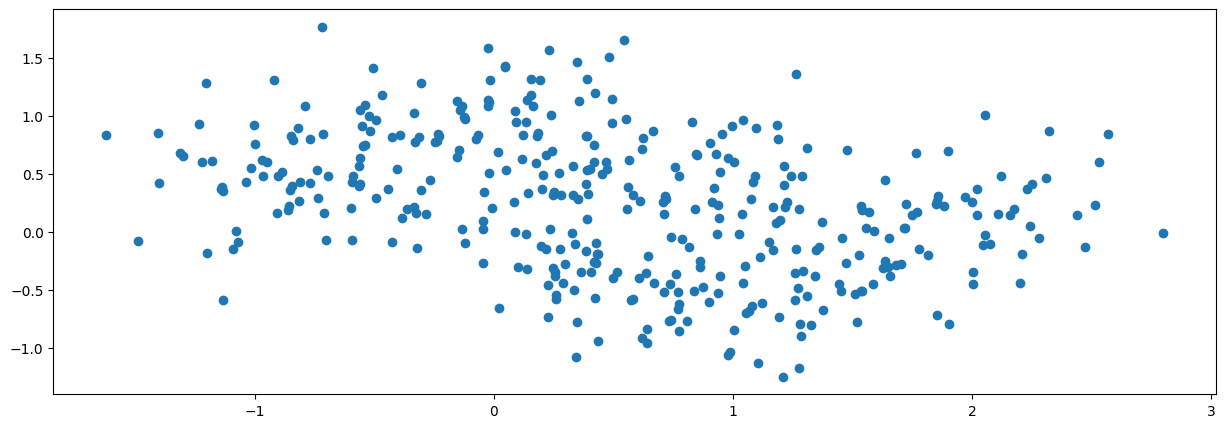

In [8]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(X_train[:,0], X_train[:,1])

## Criando os modelos

In [4]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

## Criando o ensemble com o voto majoritario
- [Documentação](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

### 1: Voto majoritário simples: modo `hard`

In [9]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', DecisionTreeClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

- Metricas:

In [10]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
DecisionTreeClassifier 0.856
SVC 0.896
VotingClassifier 0.904


### 2: Voto majoritário agregado: modo `soft`

In [11]:
# Precisa ativar as probabilidades para o SVC funcionar
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', DecisionTreeClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [12]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
DecisionTreeClassifier 0.856
SVC 0.896
VotingClassifier 0.912
